
# Classification Models on Ames Real Estate Data

_Author: Alex Chicote (NYC)_

---
<img src="./photo303159.jpeg" style="float: center; margin: 20px; height: 300px">

        Is it possible to predict if the sale for a real estate unit in Ames,IA
        will be qualified as Abnormal?

        What are the most important factors to determine it?

## Plan of Action

### Steps:



   - [1. Importing all the modules and dataframes from Notebook(AChicote-Project-3-NB-1-EDA).](#importing)
   - [2. Finding the baseline (score to beat).](#baseline) 
   - [3. Spliting train and set data and scale it.](#scaling)
   - [4. Trying different models with all features.](#models)
   - [5. Repeat the process while filtering (eliminating) models and features until reaching the score.](#second_try)
   - [6. Evaluating the final model and plotting it.](#plotting)
   

<a id='importing'></a>

In [54]:
                    # Importing all necessary modules (and more)

import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, AdaBoostRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression, LassoCV, RidgeCV, ElasticNetCV, SGDClassifier
from sklearn.feature_selection import RFE, SelectKBest, f_classif, f_regression
from sklearn.svm import SVC
%matplotlib inline

In [86]:
 # Loading data (train)
file ='final_train.csv'
train = pd.read_csv(file)
train.head()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD,sale_condition
0,109,533352170,60,69.0552,13517,6,8,1976,2005,289.0,...,0,0,0,0,0,0,0,0,1,Normal
1,544,531379050,60,43.0000,11492,7,5,1996,1997,132.0,...,0,0,0,0,0,0,0,0,1,Normal
2,153,535304180,20,68.0000,7922,5,7,1953,2007,0.0,...,0,0,0,0,0,0,0,0,1,Abnorml
3,318,916386060,60,73.0000,9802,5,5,2006,2007,0.0,...,0,0,0,0,0,0,0,0,1,Normal
4,255,906425045,50,82.0000,14235,6,8,1900,1993,0.0,...,0,0,0,0,0,0,0,0,1,Normal


In [83]:
##Repeating the process in test
file ='final_test.csv'
test = pd.read_csv(file)

test.head()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,misc_feature_Shed,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,2658,902301120,190,69.000000,9142,6,8,1910,1950,0.0,...,0,0,0,0,0,0,0,0,0,1
1,2718,905108090,90,69.630042,9662,5,4,1977,1977,0.0,...,0,0,0,0,0,0,0,0,0,1
2,2414,528218130,60,58.000000,17104,7,5,2006,2006,0.0,...,0,0,0,0,0,0,0,1,0,0
3,1989,902207150,30,60.000000,8520,5,6,1923,2006,0.0,...,0,0,0,0,0,0,0,0,0,1
4,625,535105100,20,69.630042,9500,6,5,1963,1963,247.0,...,0,0,0,0,0,0,0,0,0,1


In [87]:
##Making sure we have no surprises with undesired columns left behind
TEST = set(test.columns)
TRAIN = set(train.columns)
diff = TRAIN - TEST
DIFF = TEST - TRAIN
print(diff, DIFF)
train.drop('saleprice', inplace=True, axis=1)

{'saleprice', 'sale_condition'} set()


In [88]:
##Maping sale_condition column(our target)
train['sale_condition'] = [1 if c == 'Abnorml' else 0 for c in train.sale_condition]
train['sale_condition'].value_counts()

0    1919
1     132
Name: sale_condition, dtype: int64

<a id='baseline'></a>
# BASELINE =  0.935644

In [117]:
baseline = 1- sum(train['sale_condition'])/len(train['sale_condition'])

In [90]:
##Separating X and y in train
features = [c for c in train.columns if c!='sale_condition']
X = train[features].copy()
y = train['sale_condition'].copy()
#test.rename(columns={'id': 'Id'}, inplace=True)
XT = test.copy()

<a id='models'></a>
# DIFFERENT MODELS    
## Score: Accuracy
### Accuracy: accuracy_score(y_test, predictions)

#I will use all features and most modela available in classification. I will be discarding them as we move on.
Process:
    1. Train-test split.
    2. Scaling.
    3. Fitting.
    4. GridSearching
    5. Scoring
## Models to be used:
    1. AdaBoostClassifier
    2. GradientBoostingClassifier
    3. KNeighborsClassifier
    4. Decision Tree
    5. Random Forest
    6. Suport Vector Classifier
    
## First Try
### Best Score: 0.937621832359

In [119]:
first_score = 0.937621832359

<a id='scaling'></a>

In [91]:
X = train[features].copy()
y = train['sale_condition'].copy()
XT = test[features].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.fit_transform(X_test)
XTs = ss.fit_transform(XT)

#AdaBoost
ada = AdaBoostClassifier()
ada_params = {'n_estimators': [15, 25, 50, 75],
             'learning_rate': [0.01, 0.03, 0.05, .1, 0.2]}
ada_model = GridSearchCV(ada, param_grid=ada_params, cv=5)
ada_model.fit(Xs_train, y_train)
print('best score', ada_model.best_score_)
print('best params', ada_model.best_params_)
print('test score', ada_model.score(Xs_test, y_test))
predictions = ada_model.predict(Xs_test)
acc = accuracy_score(y_test, predictions)
print('AdaBoost', acc)
#gboosting
gbc = GradientBoostingClassifier()
gbc_params = {'n_estimators': [100, 125, 150, 175], 'loss': ['deviance', 'exponential'], 'max_depth': range(1,4)}
gbc_model = GridSearchCV(gbc, param_grid=gbc_params, cv = 5)
gbc_model.fit(Xs_train, y_train)
print('best score', gbc_model.best_score_)
print('best params', gbc_model.best_params_)
print('test score', gbc_model.score(Xs_test, y_test))
prediction = gbc_model.predict(XTs)
test['SalePrice'] = prediction
predictions = gbc_model.predict(Xs_test)
acc = accuracy_score(y_test, predictions)
print('gbc', acc)
#KNeighbors
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': range(2,6), 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree']}
knn_model = GridSearchCV(knn, param_grid=knn_params, cv=5)
knn_model.fit(Xs_train, y_train)
print('best score', knn_model.best_score_)
print('best params', knn_model.best_params_)
print('test score', knn_model.score(Xs_test, y_test))
predictions = knn_model.predict(Xs_test)
acc = accuracy_score(y_test, predictions)
print('knn', acc)
#Decision Tree
dt = DecisionTreeClassifier()
dt_params = {'max_depth': range(2, 40)}
dt_model = GridSearchCV(dt, param_grid=dt_params, cv=5)
dt_model.fit(Xs_train, y_train)
print('best score', dt_model.best_score_)
print('best params', dt_model.best_params_)
print('test score', dt_model.score(Xs_test, y_test))
predictions = dt_model.predict(Xs_test)
acc = accuracy_score(y_test, predictions)
print('DecTree', acc)
##Random Forest
rf = RandomForestClassifier()
rf_params = {'max_depth': range(2, 40), 'n_estimators': range(10, 100, 10)}
rf_model = GridSearchCV(rf, param_grid=rf_params, cv=5)
rf_model.fit(Xs_train, y_train)
print('best score', rf_model.best_score_)
print('best params', rf_model.best_params_)
print('test score', rf_model.score(Xs_test, y_test))
predictions = rf_model.predict(Xs_test)
acc = accuracy_score(y_test, predictions)
print('RandomForest', acc)
##Support Vector Machines
svc = SVC()

svc_params = {'C': range(1, 5),
             'kernel': ['linear', 'rbf']}
svc_model = GridSearchCV(svc, param_grid=svc_params, cv=5)##put cv
svc_model.fit(Xs_train, y_train)
print('best score', svc_model.best_score_)
print('best params', svc_model.best_params_)
print('test score', svc_model.score(Xs_test, y_test))
predictions = svc_model.predict(Xs_test)
acc = accuracy_score(y_test, predictions)
print('SVC', acc)
##Logistic Regression
logreg = SGDClassifier()
logreg_params = {'loss': ['hinge', 'log', 'squared_hinge'],
                'penalty': ['l1', 'l2'], 'n_jobs': [-1]}
logreg_model = GridSearchCV(logreg, param_grid=logreg_params, cv=5)
logreg_model.fit(Xs_train, y_train)
print('best score', logreg_model.best_score_)
print('best params', logreg_model.best_params_)
print('test score', logreg_model.score(Xs_test, y_test))
logreg.fit(Xs_train, y_train)
predictions = logreg_model.predict(Xs_test)
acc = accuracy_score(y_test, predictions)
print('LogReg', acc)

best score 0.936280884265
best params {'learning_rate': 0.03, 'n_estimators': 15}
test score 0.93567251462
AdaBoost 0.93567251462
best score 0.937581274382
best params {'loss': 'exponential', 'max_depth': 3, 'n_estimators': 150}
test score 0.937621832359
gbc 0.937621832359
best score 0.934980494148
best params {'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'uniform'}
test score 0.931773879142
knn 0.931773879142
best score 0.933680104031
best params {'max_depth': 2}
test score 0.93567251462
DecTree 0.93567251462
best score 0.937581274382
best params {'max_depth': 21, 'n_estimators': 10}
test score 0.931773879142
RandomForest 0.931773879142
best score 0.936280884265
best params {'C': 3, 'kernel': 'rbf'}
test score 0.933723196881
SVC 0.933723196881
best score 0.914174252276
best params {'loss': 'hinge', 'n_jobs': -1, 'penalty': 'l2'}
test score 0.912280701754
LogReg 0.912280701754


In [92]:
prediction = gbc_model.predict(XTs)
test['Sale Condition'] = prediction
for_kaggle = test[['id', 'Sale Condition']]
#for_kaggle.loc[for_kaggle['Sale Condition'] < 0, 'SalePrice'] = 0
for_kaggle.to_csv('gbcallfeatures.csv', index=False, encoding='utf-8')

## Conclusions after first try: 
### The best model is GradientBoostingRegressor
### I will only use from now on (I am dropping the rest): GradientBoosting, RandomForest and SVC 


# FEATURE SELECTION

Will proceed to select 100 variables out of the 280 that I started with. Will do it as follows:

- [1.Correlation: Select the 100 features most correlated with the target](#correlation)

- [2.LogisticRegression: Select the 100 features with the biggest coefficients in LogReg](#lasso)

- [3.Select the 100 features using Recursive Feature Elimination](#rfe)

- [4.Select 100 with SelektBest](#sb)

- [5.Select the features that are in all 4 selections above or in two of them](#selection)


PT- I am taking 200 in case I want to use more later on.

<a id='second_try'></a>
## Second Try 
### Best Score: 0.937621832359

<a id='correlation'></a>

### Correlation

In [94]:
##100 best based in correlation
corr_list = train.corr()['sale_condition'].apply(lambda x: abs(x)).sort_values(ascending=False).head(101)
corr_selection = (corr_list.index)[1:]

<a id='lasso'></a>
### LogisticRegression

In [96]:
#100 best using logreg and lasso penalty
logreg = LogisticRegression(penalty='l1')
logreg.fit(X, y)
logreg_features = []
for i, col in enumerate(X_train.columns):
        t = list([col, logreg.coef_[0,i]])
        logreg_features.append(t)
        logreg_features.sort(key=lambda x: x[1])
        logreg_features.reverse()
logreg_features
logreg_selection = []
for item in logreg_features[0:101]:
    logreg_selection.append(item[0])
len(logreg_selection)

101

<a id='rfe'></a>
### Recursive Feature Elimination (rfe)

In [45]:
#100 best using rfe. I selected 200 that I saved as weel as another one with one hundred that might recover later on
svc = SVR(kernel='linear')
rfe = RFE(svc, n_features_to_select=200, verbose=2)


rfe.fit(Xs_train, y_train)
rfe_selection = []
for i, col in enumerate([col for col in train.columns if col != 'sale_condition']):
    if rfe.support_[i] == True:
        rfe_selection.append(col)

Fitting estimator with 279 features.
Fitting estimator with 278 features.
Fitting estimator with 277 features.
Fitting estimator with 276 features.
Fitting estimator with 275 features.
Fitting estimator with 274 features.
Fitting estimator with 273 features.
Fitting estimator with 272 features.
Fitting estimator with 271 features.
Fitting estimator with 270 features.
Fitting estimator with 269 features.
Fitting estimator with 268 features.
Fitting estimator with 267 features.
Fitting estimator with 266 features.
Fitting estimator with 265 features.
Fitting estimator with 264 features.
Fitting estimator with 263 features.
Fitting estimator with 262 features.
Fitting estimator with 261 features.
Fitting estimator with 260 features.
Fitting estimator with 259 features.
Fitting estimator with 258 features.
Fitting estimator with 257 features.
Fitting estimator with 256 features.
Fitting estimator with 255 features.
Fitting estimator with 254 features.
Fitting estimator with 253 features.
F

In [66]:
##This is a very slow process. I save selection so I do not have to run it again
rfe = pd.DataFrame(rfe_selection)
rfe.to_csv('rfe_sel200.csv', index=False, encoding='utf-8')

<a id='sb'></a>
### SelectBest

In [67]:
#100 best based on selectbest
selectkbest = SelectKBest(score_func=f_classif, k=101)
selectkbest.fit(Xs_train, y_train)

sb_selection = X_train.iloc[:, selectkbest.get_support()].columns
sb_selection

/Users/fcbnyc/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [ 40  58 130 259] are constant.
  UserWarning)
/Users/fcbnyc/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Index(['id', 'overall_qual', 'overall_cond', 'year_built', 'year_remod/add',
       'mas_vnr_area', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       '1st_flr_sf',
       ...
       'garage_cond_0', 'garage_cond_TA', 'paved_drive_P', 'fence_0',
       'fence_GdPrv', 'fence_MnPrv', 'sale_type_COD', 'sale_type_New',
       'sale_type_Oth', 'sale_type_WD '],
      dtype='object', length=101)

<a id='selection'></a>
### Selection

In [97]:
#just making sure sale condition is not there
corr_selection = [c for c in corr_selection if c not in ['sale_condition', 'saleprice']]
logreg_selection = [c for c in logreg_selection if c not in ['sale_condition', 'saleprice']]
rfe_selection = [c for c in rfe_selection if c not in ['sale_condition', 'saleprice']]
sb_selection = [c for c in sb_selection if c not in ['sale_condition', 'saleprice']]

    #create some new lists of features
    first_sel = []
    first_sel_in_one = []
    first_sel_in_two = []
    first_sel_in_three = []
    for item in train.columns:
        if item in corr_selection[0:101]:
            first_sel_in_one.append(item)
            if item in logreg_selection:
                first_sel_in_two.append(item)
                if item in rfe_selection:
                    first_sel_in_three.append(item)
                    if item in sb_selection:
                        first_sel.append(item)

    print('first_sel', len(first_sel),'first_sel_in_one' ,len(first_sel_in_one),'first_sel_in_two',len(first_sel_in_two),\
          'first_sel_in_three', len(first_sel_in_three))
selections = [corr_selection, logreg_selection, rfe_selection, sb_selection, first_selection,\
            first_selection_in_two]

In [99]:

x = 0
y=0
z=0
for item in selections:
    ##I am looping all the lists of features that I am going to use
    X = train[item]
    y = train['sale_condition']
    XT = test[item]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    ss = StandardScaler()
    ss.fit(X_train)
    Xs_train = ss.transform(X_train)
    Xs_test = ss.transform(X_test)
    XTs = ss.transform(XT)


    #gboosting
    gbc = GradientBoostingClassifier()
    gbc_params = {'n_estimators': [100, 125, 150, 175], 'loss': ['deviance', 'exponential'], 'max_depth': range(1,4)}
    gbc_model = GridSearchCV(gbc, param_grid=gbc_params, cv = 5)
    gbc_model.fit(Xs_train, y_train)
    print('best score', gbc_model.best_score_)
    print('best params', gbc_model.best_params_)
    print('test score', gbc_model.score(Xs_test, y_test))
    prediction = gbc_model.predict(XTs)
    test['SalePrice'] = prediction
    predictions = gbc_model.predict(Xs_test)
    acc = accuracy_score(y_test, predictions)
    print('gbc', acc)
    if acc > x:
    x=acc
    gbc_dict['best_params'] = gbc_model.best_params_
    gbc_dict['test_score'] = gbc_model.score(Xs_test, y_test)
    gbc_dict['score'] = acc
    ##Random Forest
    rf = RandomForestClassifier()
    rf_params = {'max_depth': range(2, 40), 'n_estimators': range(10, 100, 10)}
    rf_model = GridSearchCV(rf, param_grid=rf_params, cv=5)
    rf_model.fit(Xs_train, y_train)
    print('best score', rf_model.best_score_)
    print('best params', rf_model.best_params_)
    print('test score', rf_model.score(Xs_test, y_test))
    predictions = rf_model.predict(Xs_test)
    acc = accuracy_score(y_test, predictions)
    if acc > y:
        y = acc
    print('RandomForest', acc)
    
    ##Support Vector Machines
    svc = SVC()

    svc_params = {'C': range(1, 5),
                 'kernel': ['linear', 'rbf']}
    svc_model = GridSearchCV(svc, param_grid=svc_params, cv=5)##put cv
    svc_model.fit(Xs_train, y_train)
    print('best score', svc_model.best_score_)
    print('best params', svc_model.best_params_)
    print('test score', svc_model.score(Xs_test, y_test))
    predictions = svc_model.predict(Xs_test)
    acc = accuracy_score(y_test, predictions)
    if acc > z:
        z = acc
    print('svc', acc)
print(gbc_dict)
print(x, y, z)

In [103]:
X = train[corr_selection]
y = train['sale_condition']
XT = test[corr_selection]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ss = StandardScaler()
ss.fit(X_train)
Xs_train = ss.transform(X_train)
Xs_test = ss.transform(X_test)
XTs = ss.transform(XT)

rf = RandomForestClassifier()
rf_params = {'max_depth': range(2, 40), 'n_estimators': range(10, 200, 10)}
rf_model = GridSearchCV(rf, param_grid=rf_params, cv=5)
rf_model.fit(Xs_train, y_train)
print('best score', rf_model.best_score_)
print('best params', rf_model.best_params_)
print('test score', rf_model.score(Xs_test, y_test))
predictions = rf_model.predict(Xs_test)
acc = accuracy_score(y_test, predictions)
prediction = rf_model.predict(XTs)
#prediction = ada_model.predict(XTs)
test['Sale Condition'] = prediction
for_kaggle = test[['id', 'Sale Condition']]
#for_kaggle.loc[for_kaggle['Sale Condition'] < 0, 'SalePrice'] = 0
for_kaggle.to_csv('rf100corr.csv', index=False, encoding='utf-8')

best score 0.937581274382
best params {'max_depth': 8, 'n_estimators': 20}
test score 0.93567251462


## Conclusions after the second try: 

### The best model still is GradientBoostingRegressor (I am dropping the rest)
### Train set is unbalanced and it is hard to improve the score


<a id='plotting'></a>
# Plotting

## How many  True Negatives and True Positives?
## What about the confusion matrix

In [111]:
from sklearn.metrics import roc_curve, auc

In [105]:
X = train[corr_selection]
y = train['sale_condition']
XT = test[corr_selection]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ss = StandardScaler()
ss.fit(X_train)
Xs_train = ss.transform(X_train)
Xs_test = ss.transform(X_test)
XTs = ss.transform(XT)

rf = RandomForestClassifier()
rf_params = {'max_depth': range(2, 40), 'n_estimators': range(10, 200, 10)}

rf.fit(Xs_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [110]:
from sklearn.metrics import confusion_matrix
#print(lr_lasso.C_)

yhat_rf = rf.predict(Xs_test)
yhat_rf_pp = rf.predict_proba(Xs_test)

conmat = np.array(confusion_matrix(y_test, yhat_rf, labels=[1,0]))

confusion = pd.DataFrame(conmat, index=['is_abnormal', 'is_NOT_abnormal'],
                         columns=['predicted_abnormal','predicted_NOT_abnormal'])
confusion

,predicted_abnormal,predicted_NOT_abnormal
is_abnormal,0,33
is_NOT_abnormal,3,477


In [112]:
from sklearn.metrics import roc_curve, auc
fpr_rf, tpr_rf, _ = roc_curve(y_test, yhat_rf_pp[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
#fpr_ridge, tpr_ridge, _ = roc_curve(y_test, yhat_ridge_pp[:,1])
#roc_auc_ridge = auc(fpr_ridge, tpr_ridge)

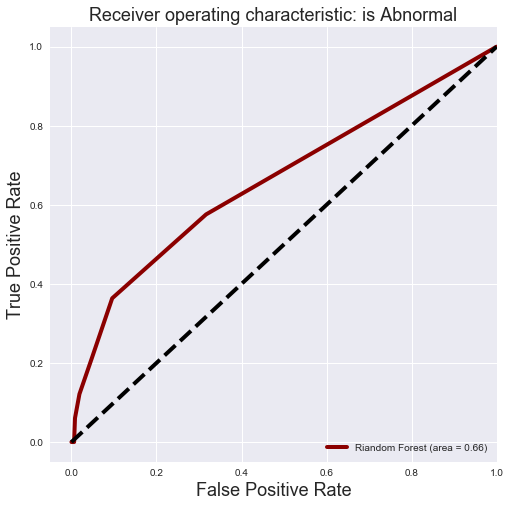

In [120]:
plt.figure(figsize=[8,8])

#plt.plot(fpr, tpr, label='Original (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % roc_auc_rf, 
         linewidth=4, color='darkred')
#plt.plot(fpr_lasso, tpr_lasso, label='Lasso (area = %0.2f)' % roc_auc_lasso, 
         #linewidth=4, color='darkgoldenrod')

plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic: is Abnormal', fontsize=18)
plt.legend(loc="lower right")
plt.show()